# Анализ оттока клиентов в сети фитнес-клубов

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. 

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. 
Необходимо провести анализ и подготовить план действий по удержанию клиентов.
Наши основные задачи:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;


- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;


- проанализировать основные признаки, наиболее сильно влияющие на отток;


- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

  1) выделить целевые группы клиентов;
  
  2) предложить меры по снижению оттока;
  
  3) определить другие особенности взаимодействия с клиентами.
  
Набор данных включает следующие поля:

- `Churn` — факт оттока в текущем месяце;
   
   Текущие поля в датасете:
   
   Данные клиента за предыдущий до проверки факта оттока месяц:
    * `gender` — пол;
    * `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
    * `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    * `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    * `Phone` — наличие контактного телефона;
    * `Age` — возраст;
    * `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).
    
    Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    * `Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
    * `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
    * `Group_visits` — факт посещения групповых занятий;
    * `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
    * `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
    * `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Загрузите-данные" data-toc-modified-id="Шаг-1.-Загрузите-данные-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Загрузите данные</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Шаг-2.-Проведите-исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Шаг-2.-Проведите-исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Проведите исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Шаг-3.-Постройте-модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Шаг-3.-Постройте-модель-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Постройте модель прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Шаг-4.-Сделайте-кластеризацию-клиентов" data-toc-modified-id="Шаг-4.-Сделайте-кластеризацию-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Сделайте кластеризацию клиентов</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Шаг-5.-Сформулируйте-выводы-и-сделайте-базовые-рекомендации-по-работе-с-клиентами" data-toc-modified-id="Шаг-5.-Сформулируйте-выводы-и-сделайте-базовые-рекомендации-по-работе-с-клиентами-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами</a></span></li></ul></div>

## Шаг 1. Загрузите данные

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)

import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings

warnings.simplefilter('ignore')

In [2]:
RANDOM_SEED = 0

In [3]:
df = pd.read_csv("../datasets/gym_churn.csv")  

Выведем произвольные строки из нашей таблицы чтобы увидеть данные.

In [4]:
display(pd.concat([df.sample(5, random_state=RANDOM_SEED)]).reset_index(drop=True))

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,1,1,1,1,12,1,29,260.507459,12.0,2,2.348167,2.323455,0
1,0,0,0,0,1,1,1,27,48.087954,1.0,0,1.003281,0.728397,1
2,0,0,1,0,1,6,0,30,24.620589,5.0,2,0.000000,0.000000,0
3,1,1,0,0,1,1,1,27,139.893107,1.0,0,2.322132,1.838436,1
4,1,0,1,0,0,12,0,29,89.657794,12.0,1,3.521502,3.368137,0


Переведем названия столбцов к нижнему регистру.

In [5]:
df.columns = map(str.lower, df.columns)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Пропущенных данных нет, всего в таблице 4000 строк и 14 столбцов. Отсутствующих признаков не наблюдается.

Видим, что можем понизить разрядность данных чтобы оптимизировать работу кода.

In [7]:
signed_features = df.select_dtypes(include='int64').columns
float_features = df.select_dtypes(include='float64').columns

df[signed_features] = df[signed_features].apply(pd.to_numeric, downcast='signed')
df[float_features] = df[float_features].apply(pd.to_numeric, downcast='float')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int8   
 1   near_location                      4000 non-null   int8   
 2   partner                            4000 non-null   int8   
 3   promo_friends                      4000 non-null   int8   
 4   phone                              4000 non-null   int8   
 5   contract_period                    4000 non-null   int8   
 6   group_visits                       4000 non-null   int8   
 7   age                                4000 non-null   int8   
 8   avg_additional_charges_total       4000 non-null   float32
 9   month_to_end_contract              4000 non-null   float32
 10  lifetime                           4000 non-null   int8   
 11  avg_class_frequency_total          4000 non-null   float

После обработки оптимизировали работу кода почти в 4 раза.

### Выводы

В данном блоке мы оценили размер датафрейма - всего в таблице 4000 строк и 14 столбцов. Пропущенных данных нет, отсутствующих признаков не наблюдается. Перевели названия столбцов к нижнему регистру, а также оптимизировали работу кода почти в 4 раза, понизив разрядность данных.

## Шаг 2. Проведите исследовательский анализ данных (EDA)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943726,96.355606,0.148205,68.868832,136.220161,210.949619,552.590759
month_to_end_contract,4000.0,4.322750,4.191298,1.000000,1.000000,1.000000,6.000000,12.000000


Из таблицы видим, что наибольший разброс в данных наблюдается у показателя `avg_additional_charges_total` (стандартное отклонение 96.35), при этом среднее - 146.9 (суммарная выручка от дополнительных процедур в фитнес центре). Почти у 85% клиентов фитнес центр находится рядом с работой или домом, примерно 41% клиентов посещают групповые занятия, 31% пришли по рекомендации друзей. Средний возраст клиентов - 29 лет, но зал посещают люди от 18 до 41 года и в гендерном соотношении разделены практически одинаково. Почти половина клиентов - сотрудники компании-партнёра клуба. Факт оттока в текущем месяце
зафиксирован у 26% клиентов.

In [10]:
df.groupby('churn').mean().reset_index()

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445709,5.283090,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082901,1.662583,0.990575,1.474995,1.044546


В текущем месяце был зафиксирован равномерный отток как мужчин, так и женщин, осталось тоже одинаковое соотношение полов. Близкая локация сыграла интересную роль, почти 76% из тех, кто прекратил посещать зал либо работают либо живут возле фитнес центра. Примерно в первый месяц люди перестают посещать зал, но при этом те, кто полны энтузиазма песещают зал в среднем 5 месяцев. Люди, посещающие зал в настоящее время в среднем тратят больше денег на дополнительные процедуры и сервисы.

**Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);**

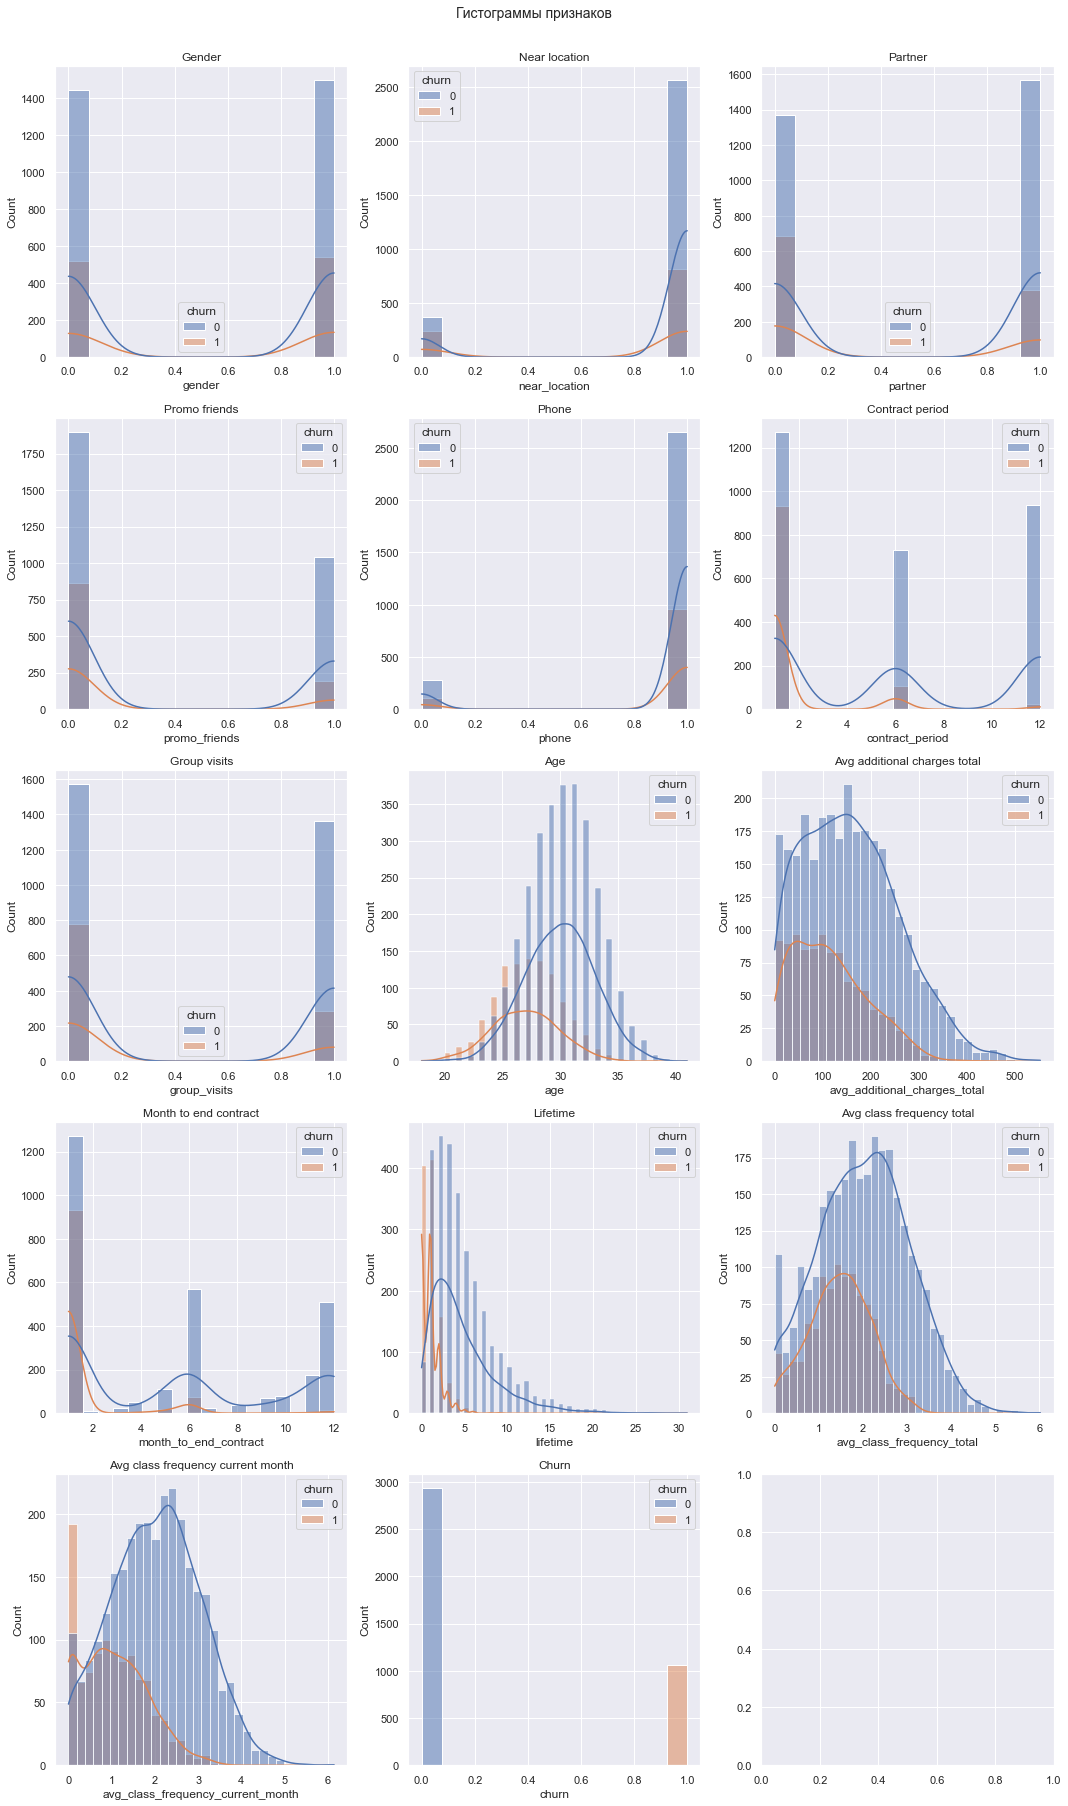

In [11]:
WIDTH = 3
plot_amount = len(df.columns)
height = plot_amount//WIDTH + 1

fig, axs = plt.subplots(height, WIDTH, figsize=(15, 25))
fig.suptitle('Гистограммы признаков',  y=1.003, size=14)

for item, ax in zip(df.columns, np.ravel(axs)):
    sns.histplot(data = df, x=item, hue='churn', ax=ax, kde=True)
    ax.set_title(item.capitalize().replace('_', ' '), size=12)

plt.tight_layout()
plt.show()

Ближе всего к нормальному распределение признака возраста посещающих фитнес центр. Причем это касается как клиентов, которые регулярно посещают фитнес центр, так и клиентов попавших в фактор оттока. Чуть больше 200 человек, у которых не был зафиксирован факт оттока воспользовались дополнительными услугами фитнес центра и принесли выручку в районе 200 у.е. с человека. По гистограмме видим, что все те, кто уходят, делают это в первые месяцы посещения зала. Чаще всего люди покупают абонемент на месяц, но при этом у данной категории клиентов наблюдается факт оттока в большей степени. Те, кто покупают абонемент на 12 месяцев, реже всего уходят в дальнейшем.

In [12]:
corr_matrix = df.corr()

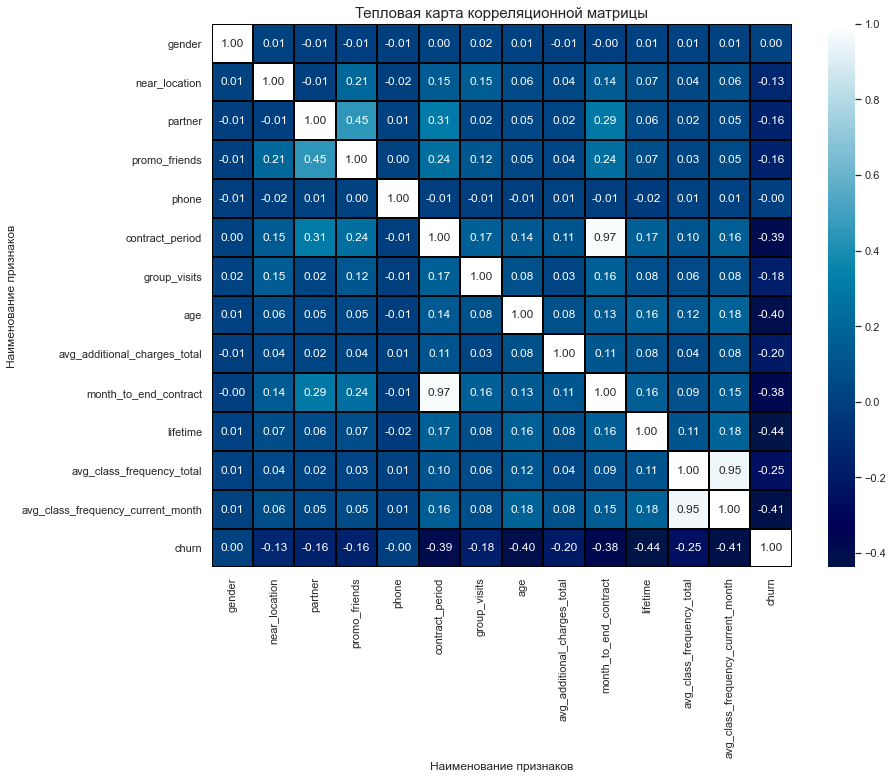

In [13]:
plt.figure(figsize = (13, 10))
plt.title('Тепловая карта корреляционной матрицы', size = 15)
sns_plot = sns.heatmap(corr_matrix, annot=True, fmt='.2f', 
                      linewidth=1, linecolor='black', vmax=1, center=0, cmap='ocean')
fig = sns_plot.get_figure()
plt.xlabel('Наименование признаков')
plt.ylabel('Наименование признаков')
plt.show()

Видим наличие корреляции между переменными `month_to_end_contract` и `contract_period`, а также между переменными `avg_class_frequency_total` и `avg_class_frequency_current_month`, что неудевительно, это взаимозависимые переменные.  

### Выводы

* Наибольший разброс в данных наблюдается у показателя avg_additional_charges_total (стандартное отклонение 96.35), при этом среднее - 146.9 (суммарная выручка от дополнительных процедур в фитнес центре). 


* Почти у 85% клиентов фитнес центр находится рядом с работой или домом, примерно 41% клиентов посещают групповые занятия, 31% пришли по рекомендации друзей. 


* Средний возраст клиентов - 29 лет, но зал посещают люди от 18 до 41 года и в гендерном соотношении разделены практически одинаково.


* Почти половина клиентов - сотрудники компании-партнёра клуба. Факт оттока в текущем месяце зафиксирован у 26% клиентов.

* В текущем месяце был зафиксирован равномерный отток как мужчин, так и женщин, осталось тоже одинаковое соотношение полов. Близкая локация сыграла интересную роль, почти 76% из тех, кто прекратил посещать зал либо работают либо живут возле фитнес центра. 


* Примерно в первый месяц люди перестают посещать зал, но при этом те, кто полны энтузиазма песещают зал в среднем 5 месяцев. Люди, посещающие зал в настоящее время в среднем тратят больше денег на дополнительные процедуры и сервисы.

* Ближе всего к нормальному распределение признака возраста посещающих фитнес центр. Причем это касается как клиентов, которые регулярно посещают фитнес центр, так и клиентов попавших в фактор оттока. 


* Чуть больше 200 человек, у которых не был зафиксирован факт оттока воспользовались дополнительными услугами фитнес центра и принесли выручку в районе 200 у.е. с человека. 


* Все те, кто уходят, делают это в первые месяцы посещения зала. Чаще всего люди покупают абонемент на месяц, но при этом у данной категории клиентов наблюдается факт оттока в большей степени. Те, кто покупают абонемент на 12 месяцев, реже всего уходят в дальнейшем.


* Мы зафиксировали наличие корреляции между переменными month_to_end_contract и contract_period, а также между переменными avg_class_frequency_total и avg_class_frequency_current_month, что неудевительно, это взаимозависимые переменные. 

## Шаг 3. Постройте модель прогнозирования оттока клиентов

Разделим наши данные на признаки (матрица X) и целевую переменную (y).

In [14]:
X = df.drop('churn', axis=1)
y = df['churn']

Разделяем модель на обучающую и валидационную выборку.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = RANDOM_SEED)

In [16]:
# обучаем StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

#Преобразовываем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [17]:
#Задаем алгоритм для модели логистической регрессии
lr_model = LogisticRegression(solver = 'lbfgs', random_state=RANDOM_SEED)

#Обучим модель
lr_model.fit(X_train_st, y_train)

#Воспользуемся обученной моделью чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

In [18]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state=RANDOM_SEED)

# обучим модель случайного леса
rf_model.fit(X_train, y_train)

# воспользуемся обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test) 
rf_probabilities = rf_model.predict_proba(X_test)[:,1] 

In [19]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    '''
    y_true - зависимая переменная валидационной выборки
    y_pred - прогнозы обученной модели
    y_proba - вероятности
    '''
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [20]:
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83


In [21]:
print_all_metrics(
    y_test, 
    rf_predictions,
    rf_probabilities,
    title = 'Метрики для модели случайного леса:'
)

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82


Метрика Accuracy одинакова в обоих моделях и равна 0.92, что является неплохим результатом - доля верно угаданных ответов из всех прогнозов. Чем ближе значение accuracy к 100%, тем лучше. Метрика Precision характеризует долю правильных ответов только среди целевого класса. В модели логистической регрессии данная метрика лучше и равна 0.85. Recall метрика показывает, сколько реальных объектов "1" класса мы смогли обнаружить с помощью модели. Для случая логистической регрессии данная метрика также лучше.

Следовательно, ***модель логистической регрессии на основании метрик показала себя лучше.*** 

### Выводы

Мы построили модели прогнозирования оттока клиентов: модель логистической регрессии и модель случайного леса.
    
Метрика Accuracy одинакова в обоих моделях и равна 0.92, что является неплохим результатом - доля верно угаданных ответов из всех прогнозов. Чем ближе значение accuracy к 100%, тем лучше. Метрика Precision характеризует долю правильных ответов только среди целевого класса. В модели логистической регрессии данная метрика лучше и равна 0.85. Recall метрика показывает, сколько реальных объектов "1" класса мы смогли обнаружить с помощью модели. Для случая логистической регрессии данная метрика также лучше.

Следовательно, модель логистической регрессии на основании метрик показала себя лучше.
    

## Шаг 4. Сделайте кластеризацию клиентов

In [22]:
# стандартизация данных
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#Построение матрицы расстояний
linked = linkage(X_sc, method = 'ward')

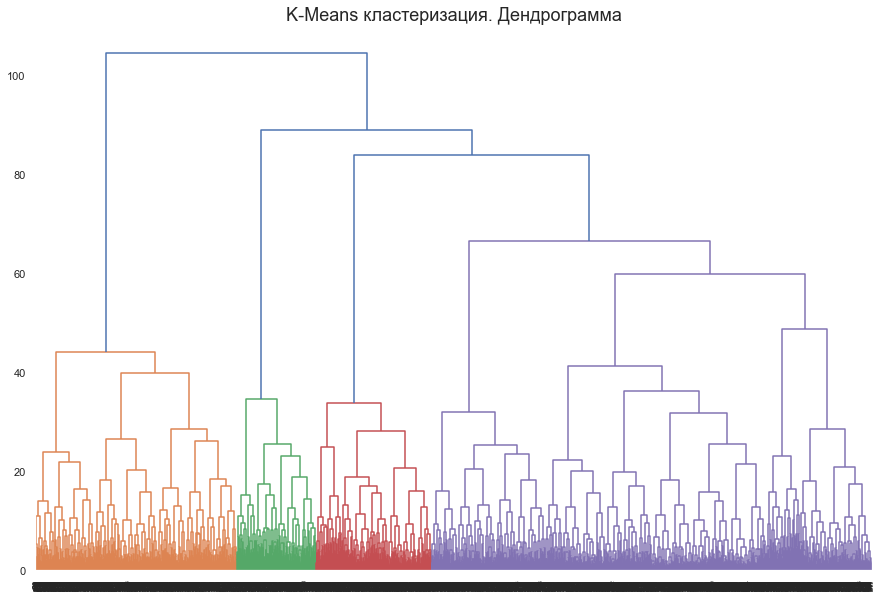

In [23]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('K-Means кластеризация. Дендрограмма', size=18)
plt.show() 

На основании полученного графика можно выделить 4 класса.

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Договоримся за число кластеров принять n=5.

In [24]:
km = KMeans(n_clusters = 5, random_state=RANDOM_SEED) # задаём число кластеров, равное 5
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

In [25]:
# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
df.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761017,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957657,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457504,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622208,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657898,2.459427,4.898568,2.852001,2.850161,0.068019


В гендерном соотношении все кластеры имеют схожее распределение мужчин/женщин, кроме кластера 4 - у него наибольшее среднее значение 0.56. Все клиенты, принадлежащие кластеру 3 либо проживают рядом с фитнес залом/ либо работают неподалеку, напротив, клиенты, относящиеся к кластеру 0 живут далеко от фитнес центра.
Средние значения признака `partner` -  сотрудник компании-партнёра клуба сильно варьируются от кластера к кластеру. Наименьшее значение у кластера 3 - 0,35, а наибольшее у кластера 0 - 0,78. Посещение зала по рекомендации друга: для данного признака также замечена сильная вариабельность от кластера к кластеру - для кластера 2, например, среднее значение равно 0.08, а для кластера 0 - аж 0.57. Среднее для признака длительность текущего абонемента  наибольшее у кластера 0 - 10.88. Среднее признака групповых посещений занятий в зале наименьшее у кластера 2 - 0,22. Возраст клиентов не сильно варьируется от кластера к кластеру и везде составляет около 30 лет. Среднее срока окончания контракта наименьшее у кластера 3 - 1.8, а наибольшее у кластера 0 - почти 9.95.

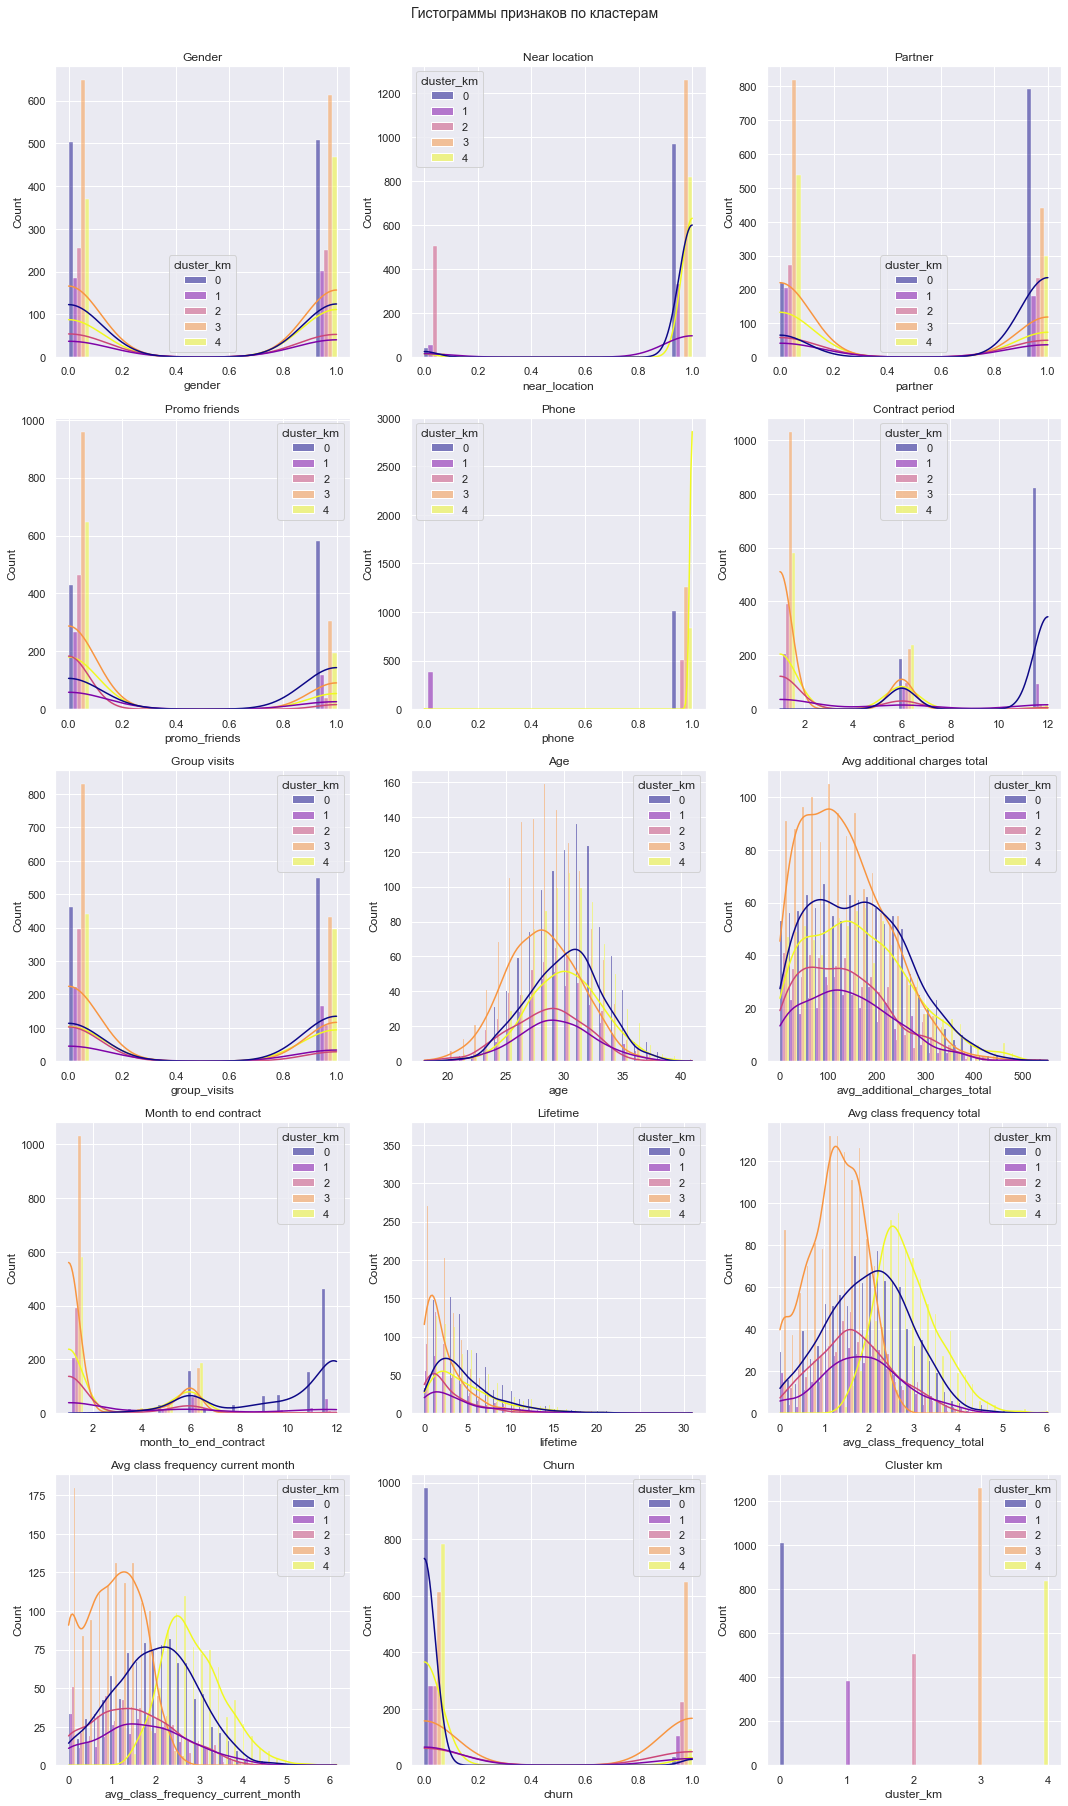

In [26]:
WIDTH = 3
height = 5

fig, axs = plt.subplots(height, WIDTH, figsize=(15, 25))
fig.suptitle('Гистограммы признаков по кластерам',  y=1.003, size=14)

for item, ax in zip(df.columns, np.ravel(axs)):
    sns.histplot(data = df, x=item, hue='cluster_km', ax=ax, kde=True, palette='plasma', multiple='dodge')
    ax.set_title(item.capitalize().replace('_', ' '), size=12)

plt.tight_layout()
plt.show()

* Кластер 0 характеризуется тем, что в нем сосредоточена наибольшая часть сотрудников компаний-партнеров клуба,  также он характерен тем, что в нем много клиентов  длительность текущего действующего абонемента которых самая большая - 12 месяцев. Клиенты, попавшие в данный кластер больше других посещают групповые занятия и срок до окончания действия контракта составляет порядка 12 месяцев в большинстве случаев. Для данного кластера доля оттока клиентов наименьшая. 


* Кластер 1 характерен тем, что у всех клиентов данной группы отсутствует номер телефона и средние значения всех признаков меньше, чем у клиентов из других кластеров. И при этом в целом в данной группе наименьшее количество людей.


* Кластер 2 характеризуется тем, что в нем больше всего клиентов, у которых фитнес зал находится далеко от дома/работы. При этом в целом в группе около 500 клиентов.


* Кластер 3 характеризуется наибольшим количеством клиентов среди всех остальных кластеров, в нем у всех клиентов зал находится рядом с домом/работой. В этом кластере много людей пришло по рекомендации друзей, но также в нем у многих клиентов длительность текущего действующего абонемента месяц - 3 месяца.


* Кластер 4 характеризуется тем, что у всех клиентов фитнес клуба есть номера телефонов, при этом данная группа сильно уступает другим кластерам в значениях, при этом почти у всех клиентов в данном кластере зафиксирован факт оттока.



Для каждого полученного кластера посчитаем долю оттока.

In [27]:
df.groupby('cluster_km').agg({'churn':'mean'}).reset_index().rename(columns={'churn':'churn_rate'})

,cluster_km,churn_rate
0,0,0.027723
1,1,0.267532
2,2,0.443564
3,3,0.514263
4,4,0.068019


Наиболее перспективные кластеры - 2 и 3 кластер. Склонные к оттоку - кластеры 0 и 4.

### Выводы

На основании полученной дендрограммы мы определили, что можно выделить 4 класса.

Мы обучили модель кластеризации на основании алгоритма K-Means и спрогнозировали кластеры клиентов и получили, что:

* Кластер 0 характеризуется тем, что в нем сосредоточена наибольшая часть сотрудников компаний-партнеров клуба,  также он характерен тем, что в нем много клиентов  длительность текущего действующего абонемента которых самая большая - 12 месяцев. Клиенты, попавшие в данный кластер больше других посещают групповые занятия и срок до окончания действия контракта составляет порядка 12 месяцев в большинстве случаев. Для данного кластера доля оттока клиентов наименьшая. 


* Кластер 1 характерен тем, что у всех клиентов данной группы отсутствует номер телефона и средние значения всех признаков меньше, чем у клиентов из других кластеров. И при этом в целом в данной группе наименьшее количество людей.


* Кластер 2 характеризуется тем, что в нем больше всего клиентов, у которых фитнес зал находится далеко от дома/работы. При этом в целом в группе около 500 клиентов.


* Кластер 3 характеризуется наибольшим количеством клиентов среди всех остальных кластеров, в нем у всех клиентов зал находится рядом с домом/работой. В этом кластере много людей пришло по рекомендации друзей, но также в нем у многих клиентов длительность текущего действующего абонемента месяц - 3 месяца.


* Кластер 4 характеризуется тем, что у всех клиентов фитнес клуба есть номера телефонов, при этом данная группа сильно уступает другим кластерам в значениях, при этом почти у всех клиентов в данном кластере зафиксирован факт оттока.


В гендерном соотношении все кластеры имеют схожее распределение мужчин/женщин, кроме кластера 4 - у него наибольшее среднее значение 0.56. Все клиенты, принадлежащие кластеру 3 либо проживают рядом с фитнес залом/ либо работают неподалеку, напротив, клиенты, относящиеся к кластеру 0 живут далеко от фитнес центра.
Средние значения признака `partner` -  сотрудник компании-партнёра клуба сильно варьируются от кластера к кластеру. Наименьшее значение у кластера 3 - 0,35, а наибольшее у кластера 0 - 0,78. Посещение зала по рекомендации друга: для данного признака также замечена сильная вариабельность от кластера к кластеру - для кластера 2, например, среднее значение равно 0.08, а для кластера 0 - аж 0.57. Среднее для признака длительность текущего абонемента  наибольшее у кластера 0 - 10.88. Среднее признака групповых посещений занятий в зале наименьшее у кластера 2 - 0,22. Возраст клиентов не сильно варьируется от кластера к кластеру и везде составляет около 30 лет. Среднее срока окончания контракта наименьшее у кластера 3 - 1.8, а наибольшее у кластера 0 - почти 9.95.

Наиболее перспективные кластеры - 2 и 3 кластер. Склонные к оттоку - кластеры 0 и 4.

## Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

* Почти у 85% клиентов фитнес центр находится рядом с работой или домом, примерно 41% клиентов посещают групповые занятия, 31% пришли по рекомендации друзей. 


* Средний возраст клиентов - 29 лет, но зал посещают люди от 18 до 41 года и в гендерном соотношении разделены практически одинаково.


* Почти половина клиентов - сотрудники компании-партнёра клуба. Факт оттока в текущем месяце зафиксирован у 26% клиентов.

* В текущем месяце был зафиксирован равномерный отток как мужчин, так и женщин, осталось тоже одинаковое соотношение полов. Близкая локация сыграла интересную роль, почти 76% из тех, кто прекратил посещать зал либо работают либо живут возле фитнес центра. 


* Примерно в первый месяц люди перестают посещать зал, но при этом те, кто полны энтузиазма песещают зал в среднем 5 месяцев. Люди, посещающие зал в настоящее время в среднем тратят больше денег на дополнительные процедуры и сервисы.


* Чуть больше 200 человек, у которых не был зафиксирован факт оттока воспользовались дополнительными услугами фитнес центра и принесли выручку в районе 200 у.е. с человека. 


* Все те, кто уходят, делают это в первые месяцы посещения зала. Чаще всего люди покупают абонемент на месяц, но при этом у данной категории клиентов наблюдается факт оттока в большей степени. Те, кто покупают абонемент на 12 месяцев, реже всего уходят в дальнейшем.


* Мы зафиксировали наличие корреляции между переменными month_to_end_contract и contract_period, а также между переменными avg_class_frequency_total и avg_class_frequency_current_month, что неудевительно, это взаимозависимые переменные. 



***Рекомендации для стратегии взаимодействия с клиентами и их удержания:***

*  Модель логистической регрессии на основании метрик показала себя лучше, следовательно для прогнозирования оттока клиентов лучше использовать именно ее. 

* Наличие в базе фитнес центра номера телефона клиента поможет избежать факта оттока, поскольку администратор, например, может иногда звонить и напоминать об преимуществах использования абонемента/ возможно предлагать какие-то акции или дополнительные процедуры. 

* Поскольку люди чаще всего бросают занятия фитнесом в первый месяц, можно придумать стратегии стимуляции интереса клиента продолжать посещать зал - например, после 10 посещений занятий в фитнес центре предлагать бесплатную процедуру массажа.

* Поскольку люди чаще всего покупают абонемент на месяц и у этой части клиентов факт оттока выражен в большей степени, можно устроить акции/розыгрыши - типа покупка абонемента на 3 месяца по цене абонемента на 1 месяц.